In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
# Load the dataset
data = pd.read_csv(r'C:\Users\USER\Downloads\data.csv')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# System libraries
import time
from datetime import datetime
from random import randint


# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras

from statsmodels.tsa.seasonal import seasonal_decompose



# import for improving a colorbar
from matplotlib.colors import rgb2hex, Normalize;
from matplotlib import rcParams

# Machine learning imports
from sklearn.preprocessing import LabelEncoder, StandardScaler;
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit, cross_validate;
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge;
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR;
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import mean_squared_error, r2_score;

# Statistical aids
from scipy.stats import kurtosis, skew;

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365217 entries, 0 to 1365216
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   rev_id              1365217 non-null  int64  
 1   comment             1365217 non-null  object 
 2   year                1365217 non-null  int64  
 3   logged_in           1365217 non-null  bool   
 4   ns                  1365217 non-null  object 
 5   sample              1365217 non-null  object 
 6   split               1365217 non-null  object 
 7   worker_id           1365217 non-null  int64  
 8   quoting_attack      1365217 non-null  float64
 9   recipient_attack    1365217 non-null  float64
 10  third_party_attack  1365217 non-null  float64
 11  other_attack        1365217 non-null  float64
 12  attack              1365217 non-null  float64
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 126.3+ MB


In [ ]:
data.sample(5).style.set_properties(
    **{
        'background-color': 'cyan',
        'color': 'black',
        'border-color': 'darkblack'
    })

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
623381,241129046,NEWLINE_TOKENNEWLINE_TOKENwhat can i edit then because i didnt add anything bad and it was context.,2008,True,user,blocked,train,2593,0.000000,0.000000,0.000000,0.000000,0.000000
919134,394680558,"NEWLINE_TOKEN:also, i am aware of the debate about whether arab admiration of nazi ideology was because of antisemitism or as a means to counter british influence. i plan on adding information regarding this as well, researching sources now.",2010,True,article,blocked,train,1942,0.000000,0.000000,0.000000,0.000000,0.000000
842851,352290837,NEWLINE_TOKENNEWLINE_TOKENWith same user,2010,False,user,random,test,950,0.000000,0.000000,0.000000,0.000000,0.000000
766811,311758365,"This page fails to explain how the creation of a Gederal Reserve System conflicts, assuming that it does, with The New Freedom. It just tosses out a claim which should either be supported or withdrawn.",2009,False,article,blocked,train,2750,0.000000,0.000000,0.000000,0.000000,0.000000
117900,47998073,NEWLINE_TOKENNEWLINE_TOKEN== Current event???? ==NEWLINE_TOKENNEWLINE_TOKENwtf is the current event about?,2006,True,article,blocked,test,15,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
data.isnull().sum()

rev_id                0
comment               0
year                  0
logged_in             0
ns                    0
sample                0
split                 0
worker_id             0
quoting_attack        0
recipient_attack      0
third_party_attack    0
other_attack          0
attack                0
dtype: int64

In [ ]:
import pandas as pd

def remove_duplicates_from_csv(input_file):
    before_count = len(data)
    data.drop_duplicates(inplace=True)
    after_count = len(data)

    # Save the changes to the same CSV file
    data.to_csv(input_file, index=False)

    if after_count < before_count:
        print("Duplicate values were removed.")
    else:
        print("No duplicate values found.")

# Example usage
input_file = 'data.csv'
remove_duplicates_from_csv(input_file)


No duplicate values found.


In [ ]:
data.describe().style.background_gradient(cmap='rainbow')

,rev_id,year,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
count,1365217.000000,1365217.000000,1365217.000000,1365217.000000,1365217.000000,1365217.000000,1365217.000000,1365217.000000
mean,299974474.465235,2009.219187,1339.285722,0.007525,0.111782,0.032648,0.032318,0.166960
std,198421440.652275,2.900762,1053.386638,0.086419,0.315098,0.177712,0.176843,0.372940
min,37675.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,126867740.000000,2007.000000,445.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,269997593.000000,2009.000000,1079.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,459291144.000000,2011.000000,2062.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,699897151.000000,2016.000000,4052.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

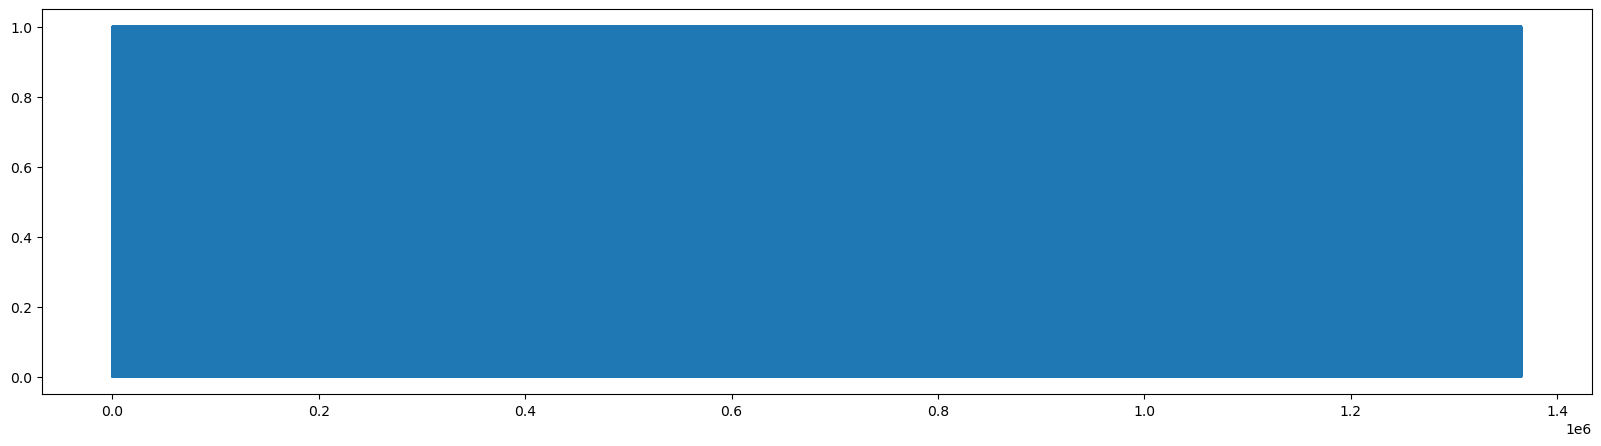

In [ ]:
data['attack'].plot(figsize=(20,5))

In [ ]:
texts = data['comment'].values
labels = data['attack'].values

In [ ]:
max_samples = 50000  # Choose a smaller number of samples to use
texts = texts[:max_samples]
labels = labels[:max_samples]

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [ ]:
max_len = 200  # Set a maximum sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [ ]:
# Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_len))
model.add(tf.keras.layers.Conv1D(128, 5, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
625/625 [==============================] - 109s 171ms/step - loss: 0.2934 - accuracy: 0.8955 - val_loss: 0.2551 - val_accuracy: 0.9060
Epoch 2/5
625/625 [==============================] - 109s 174ms/step - loss: 0.2365 - accuracy: 0.9073 - val_loss: 0.2584 - val_accuracy: 0.9070
Epoch 3/5
625/625 [==============================] - 106s 170ms/step - loss: 0.2245 - accuracy: 0.9082 - val_loss: 0.2624 - val_accuracy: 0.9085
Epoch 4/5
625/625 [==============================] - 118s 189ms/step - loss: 0.2181 - accuracy: 0.9102 - val_loss: 0.2737 - val_accuracy: 0.9098
Epoch 5/5
625/625 [==============================] - 118s 189ms/step - loss: 0.2142 - accuracy: 0.9091 - val_loss: 0.2881 - val_accuracy: 0.9004


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

313/313 [==============================] - 5s 15ms/step - loss: 0.2881 - accuracy: 0.9004
Test Loss: 0.2881
Test Accuracy: 0.9004


In [ ]:
# Save the model
model.save("aggression_detection_model.h5")